In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/APP CAÑERO/LOTES ADMINISTRATIVOS/CITTCA/CITTCA.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

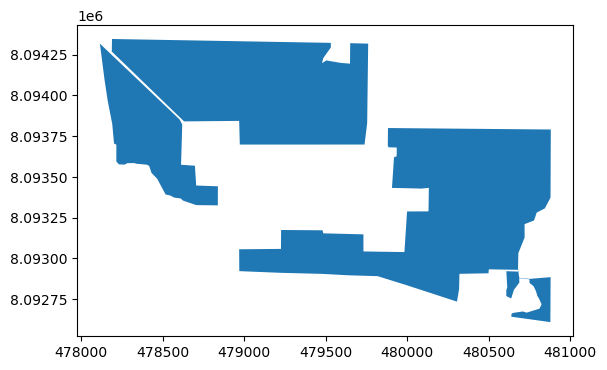

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,textura,financia,soca,cultivo,zona,area,fs,geometry
0,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,SOCA,UCG_90-20,FY,NaN,0,canha,0,101.880644,2021-03-25,"POLYGON Z ((479881.615 8093799.314 0.000, 4808..."
1,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,HOJA,UCG_90-20,FY,NaN,0,canha,0,76.910832,2021-03-25,"POLYGON Z ((478189.223 8094345.350 0.000, 4795..."
2,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,ESTRUCTURA,RENOVACION,FY,NaN,0,renovacion,0,27.667965,2021-03-25,"POLYGON Z ((478114.827 8094316.761 0.000, 4786..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

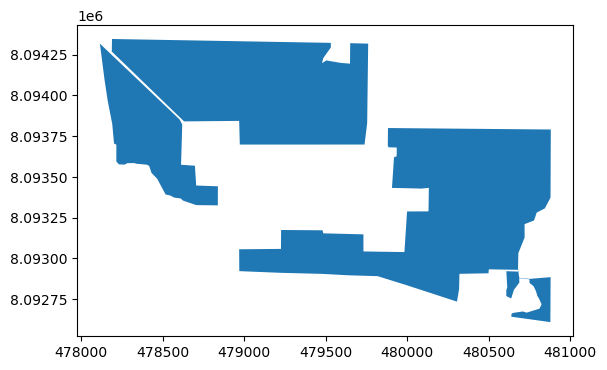

In [9]:
propiedad = data[data['unidad_01']==299]
propiedad.plot()
plt.show()

In [10]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [11]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'unidad_01':'int',
    'unidad_03':'int'
})

In [12]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,textura,financia,soca,cultivo,zona,area,fs,geometry
0,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,SOCA,UCG_90-20,FY,NaN,0,canha,0,101.880644,2021-03-25,"POLYGON Z ((479881.615 8093799.314 0.000, 4808..."
1,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,HOJA,UCG_90-20,FY,NaN,0,canha,0,76.910832,2021-03-25,"POLYGON Z ((478189.223 8094345.350 0.000, 4795..."
2,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,ESTRUCTURA,RENOVACION,FY,NaN,0,renovacion,0,27.667965,2021-03-25,"POLYGON Z ((478114.827 8094316.761 0.000, 4786..."


In [13]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'299_C.I.T.T.C.A'

In [14]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,tex,financia,soca,cultivo,zona,area,fs,geometry
0,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,SOCA,UCG_90-20,FY,NaN,0,canha,0,101.880644,2021-03-25,"POLYGON Z ((479881.615 8093799.314 0.000, 4808..."
1,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,HOJA,UCG_90-20,FY,NaN,0,canha,0,76.910832,2021-03-25,"POLYGON Z ((478189.223 8094345.350 0.000, 4795..."
2,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,ESTRUCTURA,RENOVACION,FY,NaN,0,renovacion,0,27.667965,2021-03-25,"POLYGON Z ((478114.827 8094316.761 0.000, 4786..."


In [15]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [16]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [17]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,tex,financia,soca,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,SOCA,UCG_90-20,FY,NaN,0,...,101.880644,UCG_90-20,2021-03-25,0,,0,1530,299,NaN,0
1,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,HOJA,UCG_90-20,FY,NaN,0,...,76.910832,UCG_90-20,2021-03-25,0,,0,1530,299,NaN,0
2,NaN,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,ESTRUCTURA,RENOVACION,FY,NaN,0,...,27.667965,RENOVACION,2021-03-25,0,,0,1530,299,NaN,0


In [18]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area', 'fs',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [19]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [20]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG_90-20,2021-03-25,0,,0,1530,299,NaN,0
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG_90-20,2021-03-25,0,,0,1530,299,NaN,0
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,2021-03-25,0,,0,1530,299,NaN,0


In [21]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        elif year > 2000:
            return 'SOCA'
        else:
            return 'RENOVACION'
    except Exception as ex:
        return 'RENOVACION'

In [22]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [23]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [24]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG_90-20,20210325,0,SOCA,0,1530,299,NaN,0
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG_90-20,20210325,0,SOCA,0,1530,299,NaN,0
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,0,1530,299,NaN,0


In [25]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [26]:
tchs = pd.read_excel(fp_tch)

In [27]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,0.00,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,7138.06,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,3537.96,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO


In [28]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [29]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int',
    'COD_PROP':'int'
})

In [30]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

C:\Users\UTEA\AppData\Local\Temp\ipykernel_24968\1276023081.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])


,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,NaN,0
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,NaN,0
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,52.057734,1530,299,NaN,0


In [31]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [32]:
bloques = pd.read_excel(fp_bloques)

In [33]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,riegos_pos,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG9020,44743,44743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG9020,44768,44768.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA8522,44783,44783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [34]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [35]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

C:\Users\UTEA\AppData\Local\Temp\ipykernel_24968\261198729.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  bloque_int = int(bloque)


,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,NaN,359
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,NaN,359
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,52.057734,1530,299,NaN,359


In [36]:
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)

In [37]:
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,00002990000SOCA,359
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG_90-20,20210325,0,SOCA,52.057734,1530,299,00002990000HOJA,359
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,52.057734,1530,299,00002990000ESTRUCTURA,359


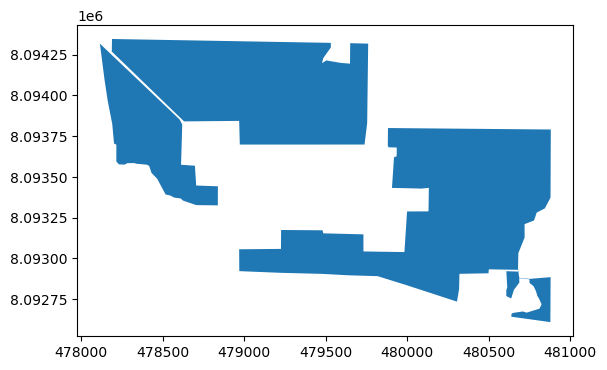

In [38]:
propiedad.plot()
plt.show()

In [39]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [40]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG 90-20,20210325,0,SOCA,52.057734,1530,299,00002990000SOCA,359
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG 90-20,20210325,0,SOCA,52.057734,1530,299,00002990000HOJA,359
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,52.057734,1530,299,00002990000ESTRUCTURA,359


In [41]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
0,"POLYGON Z ((479881.615 8093799.314 0.000, 4808...",SOCA,FY,101.880644,UCG 90-20,20210325,0,SOCA,52.057734,1530,299,00002990000SOCA,359
1,"POLYGON Z ((478189.223 8094345.350 0.000, 4795...",HOJA,FY,76.910832,UCG 90-20,20210325,0,SOCA,52.057734,1530,299,00002990000HOJA,359
2,"POLYGON Z ((478114.827 8094316.761 0.000, 4786...",ESTRUCTURA,FY,27.667965,RENOVACION,20210325,0,SOCA,52.057734,1530,299,00002990000ESTRUCTURA,359


In [42]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
propiedad = propiedad.to_crs(epsg=4326)

In [44]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
propiedad['SUPERFICIE'].sum()

206.45944058139997

In [46]:
file_name + '.geojson'

'299_C.I.T.T.C.A.geojson'

In [47]:
#file_name='d'

In [48]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [49]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [50]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\299_C.I.T.T.C.A.geojson'

In [52]:
propiedad.to_file(out_dir, driver='GeoJSON')